In [1]:
# always follow the Google R style guide: https://google.github.io/styleguide/Rguide.xml

install.packages(c('data.table', 'ggplot2'), repos='http://cran.us.r-project.org')

library(data.table)
library(ggplot2)

package 'data.table' successfully unpacked and MD5 sums checked
package 'ggplot2' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\ngeorge\AppData\Local\Temp\RtmpqIcrEf\downloaded_packages


Warning message:
"package 'ggplot2' was built under R version 3.3.3"

In [2]:
# shows the current working directory (wd)
getwd()

[1] "C:/Users/ngeorge/Documents/GitHub/lending_club_EDA"

In [4]:
# loading takes a while...

# this should be the path to the data.  Adapt for your system
win_filepath <- 'C:/Users/ngeorge/Documents/GitHub/preprocess_lending_club_data/full_data/'
accepted_def <- read.csv(gzfile(paste(win_filepath, 'accepted_2007_to_2016.csv.gz', sep='')), na.strings='')
acc_dt <- as.data.table(accepted_def)

In [5]:
# that's a lot of observations
dim(acc_dt)

[1] 1321847     110

In [13]:
class(acc_dt)

[1] "data.table" "data.frame"

In [8]:
names(acc_dt)

[1] "id"                             "member_id"                     
  [3] "loan_amnt"                      "funded_amnt"                   
  [5] "funded_amnt_inv"                "term"                          
  [7] "int_rate"                       "installment"                   
  [9] "grade"                          "sub_grade"                     
 [11] "emp_title"                      "emp_length"                    
 [13] "home_ownership"                 "annual_inc"                    
 [15] "verification_status"            "issue_d"                       
 [17] "loan_status"                    "pymnt_plan"                    
 [19] "desc"                           "purpose"                       
 [21] "title"                          "zip_code"                      
 [23] "addr_state"                     "dti"                           
 [25] "delinq_2yrs"                    "earliest_cr_line"              
 [27] "inq_last_6mths"                 "mths_since_last_delinq"        
 [29] "mths_since_last_record"         "open_acc"                      
 [31] "pub_rec"                        "revol_bal"                     
 [33] "revol_util"                     "total_acc"                     
 [35] "initial_list_status"            "out_prncp"                     
 [37] "out_prncp_inv"                  "total_pymnt"                   
 [39] "total_pymnt_inv"                "total_rec_prncp"               
 [41] "total_rec_int"                  "total_rec_late_fee"            
 [43] "recoveries"                     "collection_recovery_fee"       
 [45] "last_pymnt_d"                   "last_pymnt_amnt"               
 [47] "next_pymnt_d"                   "last_credit_pull_d"            
 [49] "collections_12_mths_ex_med"     "mths_since_last_major_derog"   
 [51] "policy_code"                    "application_type"              
 [53] "annual_inc_joint"               "dti_joint"                     
 [55] "verification_status_joint"      "acc_now_delinq"                
 [57] "tot_coll_amt"                   "tot_cur_bal"                   
 [59] "open_acc_6m"                    "open_il_6m"                    
 [61] "open_il_12m"                    "open_il_24m"                   
 [63] "mths_since_rcnt_il"             "total_bal_il"                  
 [65] "il_util"                        "open_rv_12m"                   
 [67] "open_rv_24m"                    "max_bal_bc"                    
 [69] "all_util"                       "total_rev_hi_lim"              
 [71] "inq_fi"                         "total_cu_tl"                   
 [73] "inq_last_12m"                   "acc_open_past_24mths"          
 [75] "avg_cur_bal"                    "bc_open_to_buy"                
 [77] "bc_util"                        "chargeoff_within_12_mths"      
 [79] "delinq_amnt"                    "mo_sin_old_il_acct"            
 [81] "mo_sin_old_rev_tl_op"           "mo_sin_rcnt_rev_tl_op"         
 [83] "mo_sin_rcnt_tl"                 "mort_acc"                      
 [85] "mths_since_recent_bc"           "mths_since_recent_bc_dlq"      
 [87] "mths_since_recent_inq"          "mths_since_recent_revol_delinq"
 [89] "num_accts_ever_120_pd"          "num_actv_bc_tl"                
 [91] "num_actv_rev_tl"                "num_bc_sats"                   
 [93] "num_bc_tl"                      "num_il_tl"                     
 [95] "num_op_rev_tl"                  "num_rev_accts"                 
 [97] "num_rev_tl_bal_gt_0"            "num_sats"                      
 [99] "num_tl_120dpd_2m"               "num_tl_30dpd"                  
[101] "num_tl_90g_dpd_24m"             "num_tl_op_past_12m"            
[103] "pct_tl_nvr_dlq"                 "percent_bc_gt_75"              
[105] "pub_rec_bankruptcies"           "tax_liens"                     
[107] "tot_hi_cred_lim"                "total_bal_ex_mort"             
[109] "total_bc_limit"                 "total_il_high_credit_limit"

In [28]:
str(acc_dt, list.len=ncol(acc_dt))

Classes ‘data.table’ and 'data.frame':	1321847 obs. of  110 variables:
 $ id                            : int  1077501 1077430 1077175 1076863 1075358 1075269 1069639 1072053 1071795 1071570 ...
 $ member_id                     : num  1296599 1314167 1313524 1277178 1311748 ...
 $ loan_amnt                     : num  5000 2500 2400 10000 3000 ...
 $ funded_amnt                   : num  5000 2500 2400 10000 3000 ...
 $ funded_amnt_inv               : num  4975 2500 2400 10000 3000 ...
 $ term                          : Factor w/ 2 levels " 36 months"," 60 months": 1 2 1 1 2 1 2 1 2 2 ...
 $ int_rate                      : num  10.7 15.3 16 13.5 12.7 ...
 $ installment                   : num  162.9 59.8 84.3 339.3 67.8 ...
 $ grade                         : Factor w/ 7 levels "A","B","C","D",..: 2 3 3 3 2 1 3 5 6 2 ...
 $ sub_grade                     : Factor w/ 35 levels "A1","A2","A3",..: 7 14 15 11 10 4 15 21 27 10 ...
 $ emp_title                     : Factor w/ 381900 levels " ","

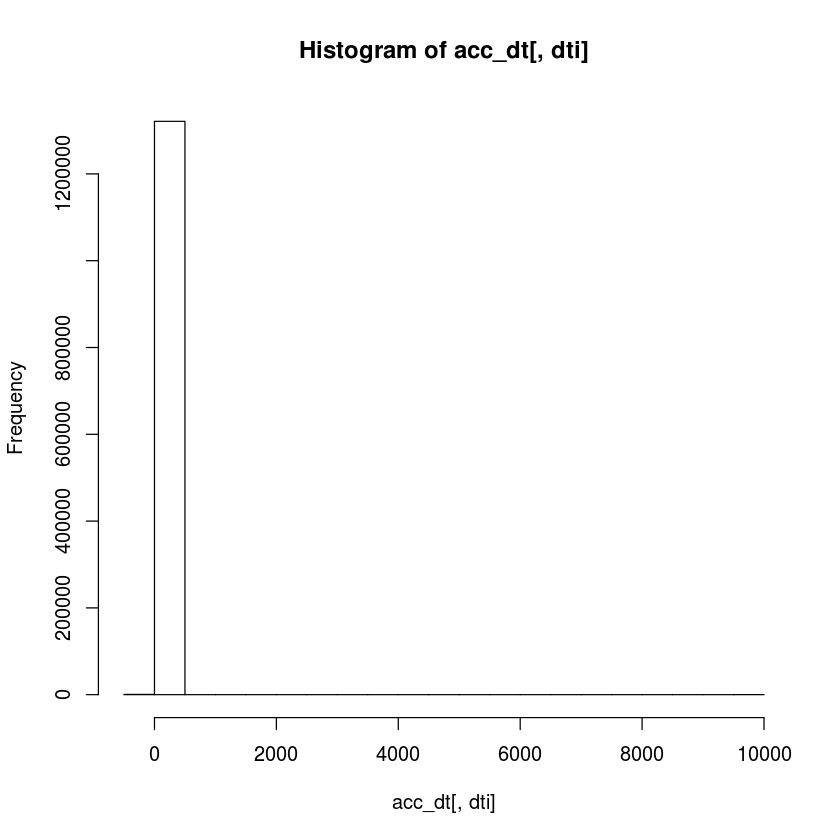

In [7]:
# outliers are screwing it up!
hist(acc_dt[, dti])

In [8]:
# from here: http://stackoverflow.com/questions/4787332/how-to-remove-outliers-from-a-dataset
remove_outliers <- function(x, na.rm = TRUE, ...) {
  qnt <- quantile(x, probs=c(.25, .75), na.rm = na.rm, ...)
  H <- 1.5 * IQR(x, na.rm = na.rm)
  y <- x
  y[x < (qnt[1] - H)] <- NA
  y[x > (qnt[2] + H)] <- NA
  y
}

In [9]:
dti_no_outliers <- remove_outliers(acc_dt[, dti])

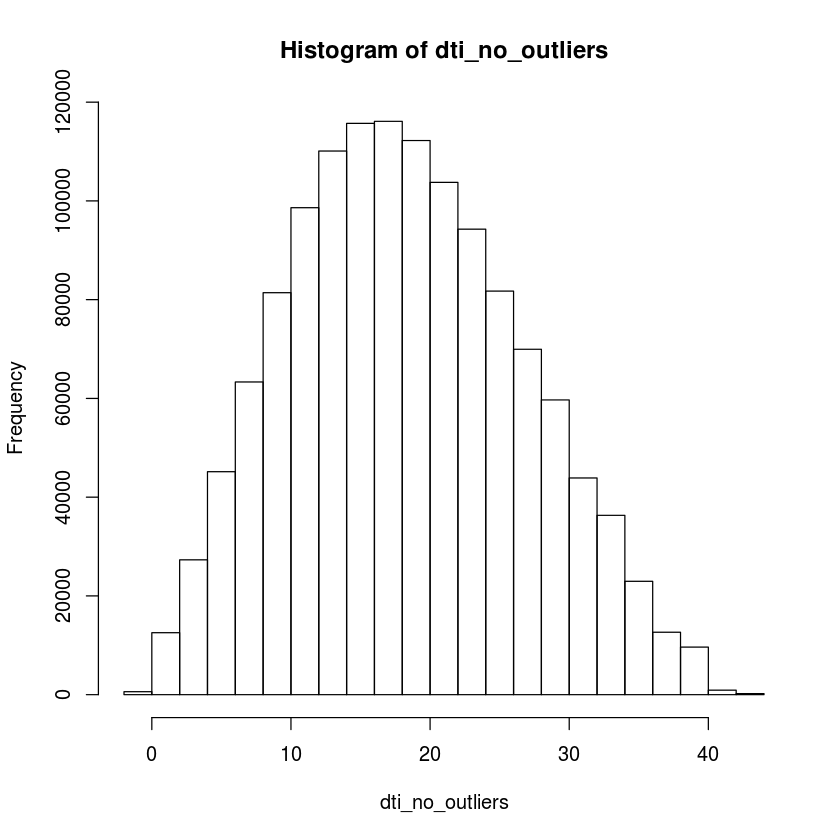

In [10]:
hist(dti_no_outliers)

## Now lets look at interest rates for the different loan grades.  Are they statistically significant from each other?
## For this we can do ANOVA to test if the mean interest rate for different loan grades is stastistically significantly different.

### This [data.table cheat sheet](https://s3.amazonaws.com/assets.datacamp.com/img/blog/data+table+cheat+sheet.pdf) may come in handy here.

## First things first:  can you show the unique values in a column?  Let's look at the unique values for the 'grade' column.  Print them out in alphabetical order so it looks like:

A B C D E F G 

## Hints:
https://stat.ethz.ch/R-manual/R-devel/library/base/html/sort.html

https://stat.ethz.ch/R-manual/R-devel/library/base/html/unique.html

In [13]:
#TODO: print the unique values for the grade column

[1] A B C D E F G
Levels: A B C D E F G

## Now can you show the grades and their average interest rates?  You will need to group by the grades and calculate the mean to answer this question.  It should look like this:

| grade |	Avg_Interest_Rate |
|:---|:---|
|A |	7.129947
|B |	10.626637
|C |	13.918715
|D |	17.502870
|E |	20.574477
|F |	24.230820
|G |	26.653138

### Hints:
http://www.statmethods.net/management/sorting.html

http://www.r-tutor.com/elementary-statistics/numerical-measures/mean

In [ ]:
acc_dt[, grade]

In [15]:
# TODO:  print out average interest rates for each grade
acc_dt[, .(avg_int_rate=mean(int_rate)), by=grade]

grade,avg_int_rate
B,10.626637
C,13.918715
A,7.129947
E,20.574477
F,24.230820
D,17.502870
G,26.653138


## Now make a bar plot with that data; it should look like this:

![barplot](./barplot.png)

## Hints:
https://stat.ethz.ch/R-manual/R-devel/library/graphics/html/barplot.html


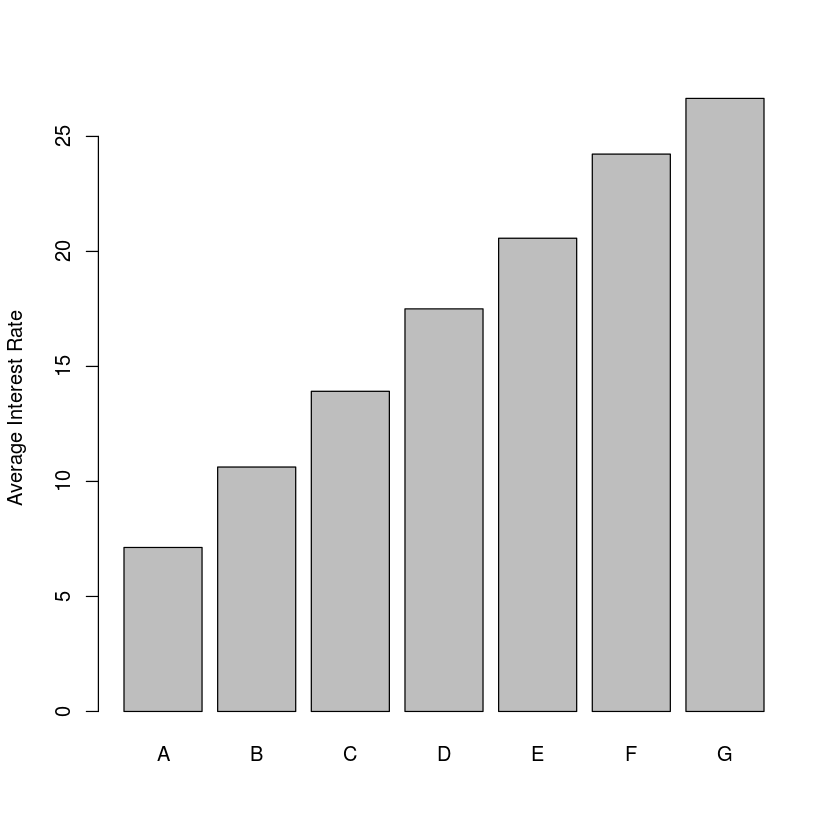

In [27]:
# TODO: show barplot of interest rates for each grade

## That's nice, but it's hard to tell how different the interest rates are.  Instead, let's make a box and whisker plot.

## Hints:
https://www.r-bloggers.com/summarising-data-using-box-and-whisker-plots/

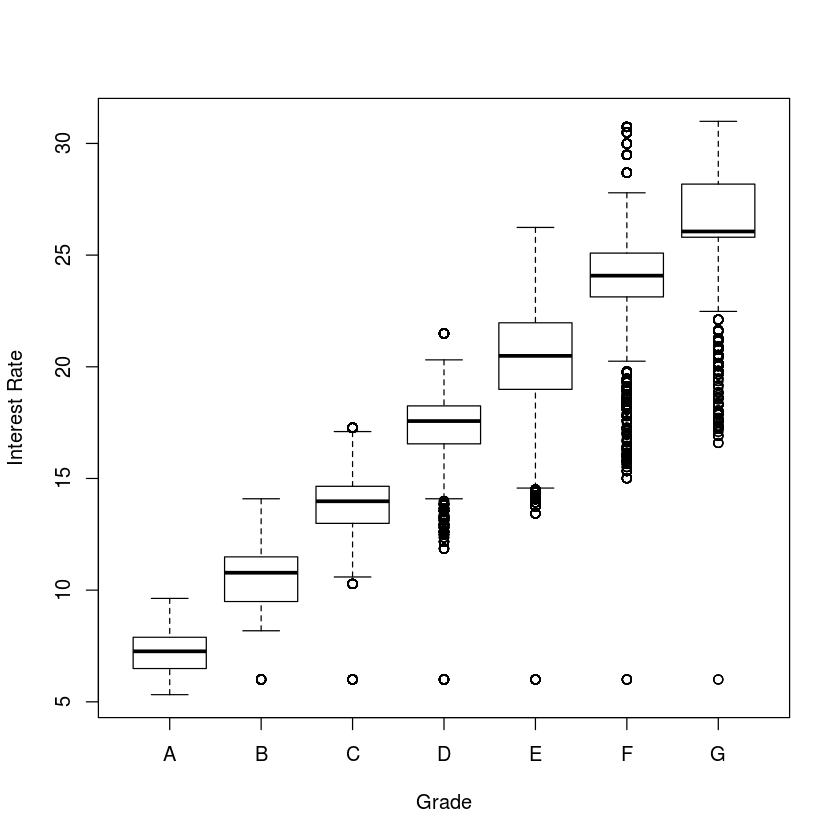

In [34]:
# TODO: make boxplot of the interest rate vs grade

## Now let's do one-way ANOVA.  All this test will tell us is if the grade of the loan has any statistically significant effect on the interest rate.  What do you hypothesize?  That it will, or won't?

## Hints:
http://www.statmethods.net/stats/anova.html

http://www.gardenersown.co.uk/education/lectures/r/anova.htm

In [31]:
# TODO: do ANOVA on interest rates and grades

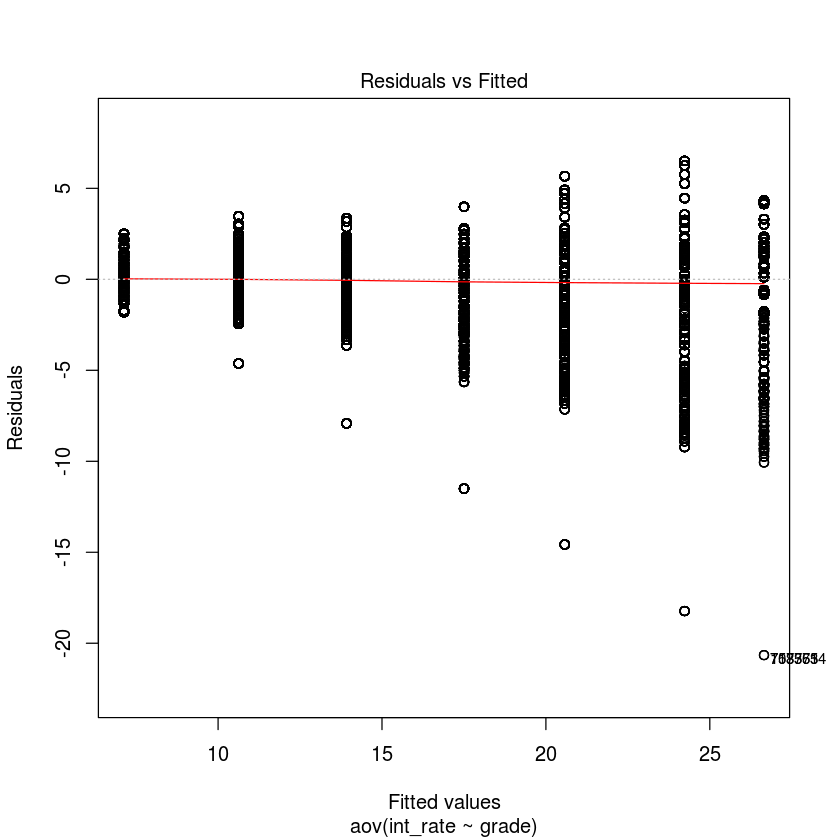

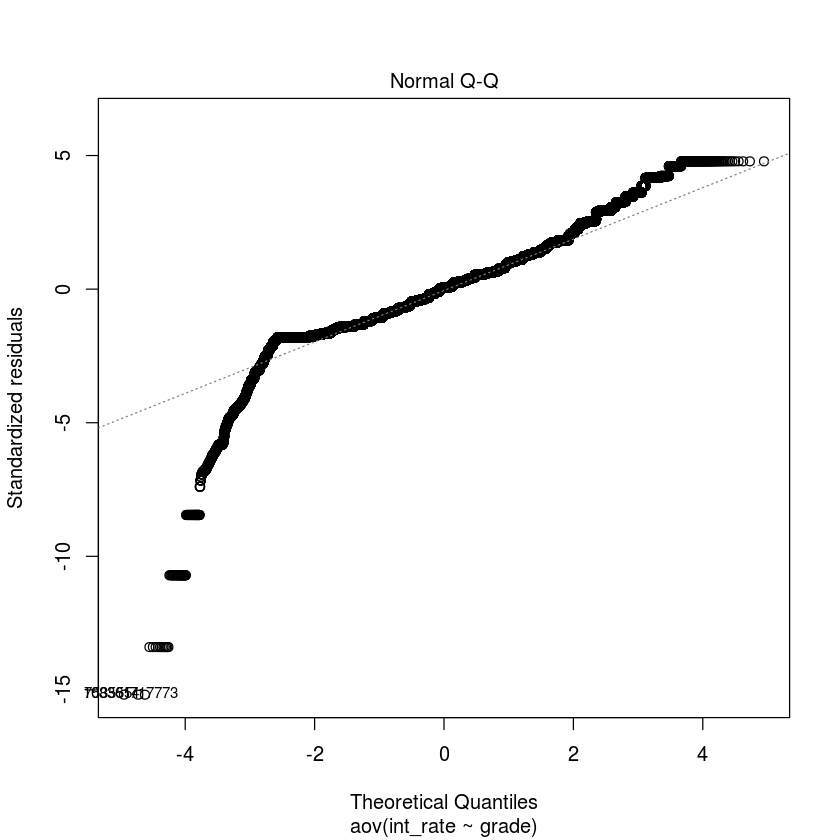

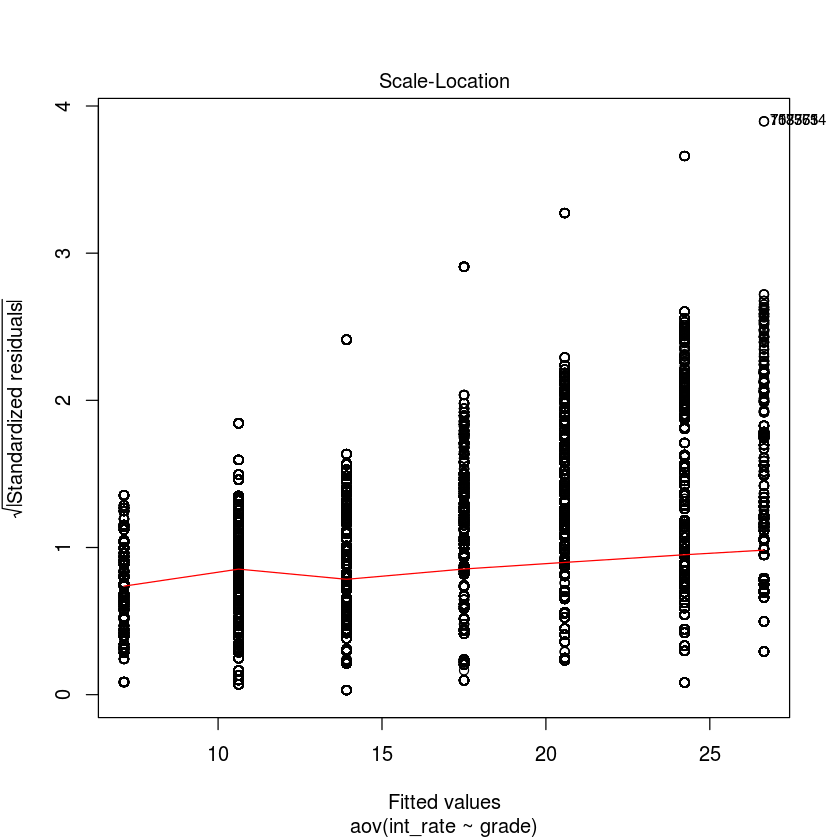

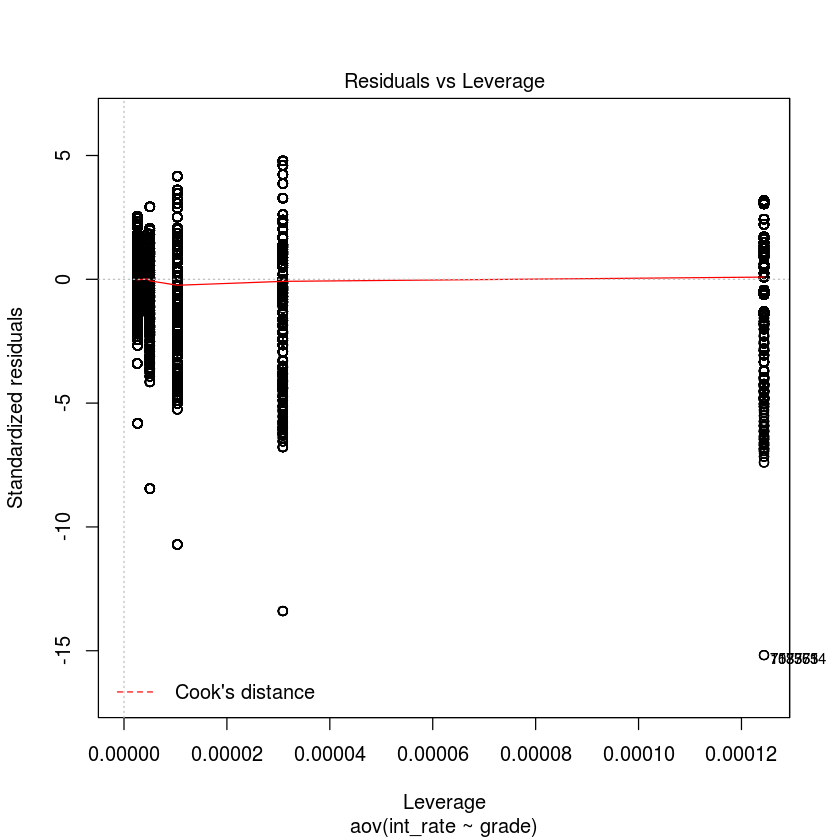

In [36]:
# OPTIONAL TODO: plot the ANOVA fit
# warning...this takes some time.  at least a minute or two...it will make many plots
# we're looking for homoscedasticity here: https://en.wikipedia.org/wiki/Homoscedasticity
# if the residuals are very biased to one side or the other, the analysis may not be trustworthy

In [37]:
# TODO: print out summary of the ANOVA fit

# we can see from the Pr(>F),
# i.e. the probability of the F-statistic being greater than the value we found on the F-distribution,
# in other words, the area under the F-distribution with F greater than the F value we found,
# is very small.  Usually we use 0.05 as a threshold for statistical significance, so in this case,
# Pr(>F) is much smaller than 0.05, and therefore is statistically signficant.

                 Df   Sum Sq Mean Sq F value Pr(>F)    
grade             6 25166007 4194334 2264787 <2e-16 ***
Residuals   1321840  2448017       2                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

## Now we want to see which loan grades are statistically different from the others.  For this, we can do a [Tukey HSD test](https://en.wikipedia.org/wiki/Tukey's_range_test).

## Hints:
http://www.gardenersown.co.uk/education/lectures/r/anova.htm

In [38]:
# TODO: perform a Tukey HSD test

# here we're looking at the p adj column, which is the p-value of the pairwise comparisons.  If this is less than 0.05, 
# we can say it's a statistically significant difference 

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = int_rate ~ grade, data = acc_dt)

$grade
         diff       lwr       upr p adj
B-A  3.496690  3.485973  3.507408     0
C-A  6.788768  6.777994  6.799542     0
D-A 10.372923 10.360493 10.385353     0
E-A 13.444530 13.429029 13.460032     0
F-A 17.100874 17.076986 17.124761     0
G-A 19.523191 19.477630 19.568752     0
C-B  3.292078  3.282915  3.301241     0
D-B  6.876233  6.865170  6.887295     0
E-B  9.947840  9.933412  9.962268     0
F-B 13.604183 13.580977 13.627389     0
G-B 16.026501 15.981294 16.071708     0
D-C  3.584155  3.573038  3.595272     0
E-C  6.655762  6.641292  6.670232     0
F-C 10.312106 10.288874 10.335337     0
G-C 12.734423 12.689203 12.779643     0
E-D  3.071607  3.055865  3.087349     0
F-D  6.727950  6.703906  6.751995     0
G-D  9.150268  9.104625  9.195911     0
F-E  3.656343  3.630576  3.682110     0
G-E  6.078661  6.032087  6.125234     0
G-F  2.422318  2.372323 

## Now find another variable other than grade, and see if the interest rate depends on that variable in a statistically significant way.  Go through a similar process as we did above -- first plotting the data to visually inspect the differences, then doing statistical tests to check for differences.

## Make sure to choose a variable that is a 'Factor' (you can check them in the summary near the top), and don't use subgrade since we already used grade (unless you want to get fancy and subset one of the grades, then check the subgrades within that grade).
## Also make sure not to choose one of the factors with 100s of levels; these were mistaken as factors by R during auto-parsing of the data.